# Load Dataset & Basic Info

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset (change the file name if needed)
df = pd.read_csv('Dataset.csv')

# Basic Information
print("\nDataset Loaded: {} rows, {} columns".format(df.shape[0], df.shape[1]))
print("\nColumn Names:\n", df.columns.tolist())



Dataset Loaded: 9551 rows, 21 columns

Column Names:
 ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


# Table Booking & Online Delivery Percentages

In [2]:
# Table Booking Percentage
if 'Has Table booking' in df.columns:
    table_booking_counts = df['Has Table booking'].value_counts(normalize=True) * 100
    print("\nTable Booking Availability (%):\n", table_booking_counts)
else:
    print("\n'Has Table booking' column not found.")

# Online Delivery Percentage
if 'Has Online delivery' in df.columns:
    online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100
    print("\nOnline Delivery Availability (%):\n", online_delivery_counts)
else:
    print("\n'Has Online delivery' column not found.")



Table Booking Availability (%):
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery Availability (%):
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


# Average Ratings - Table Booking vs. No Table Booking



In [3]:
# Average Ratings for Table Booking vs. No Table Booking
if 'Has Table booking' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean().round(2)
    print("\nAverage Ratings (with and without Table Booking):\n", avg_rating_table_booking)
else:
    print("\nColumns for Table Booking Rating Analysis missing.")



Average Ratings (with and without Table Booking):
 Has Table booking
No     2.56
Yes    3.44
Name: Aggregate rating, dtype: float64


# Online Delivery Availability by Price Range



In [4]:
# Online Delivery % by Price Range
if 'Has Online delivery' in df.columns and 'Price range' in df.columns:
    delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
    print("\nOnline Delivery by Price Range (%):\n", delivery_by_price)
else:
    print("\nColumns for Online Delivery by Price Range missing.")



Online Delivery by Price Range (%):
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


# Visualization - Online Delivery by Price Range

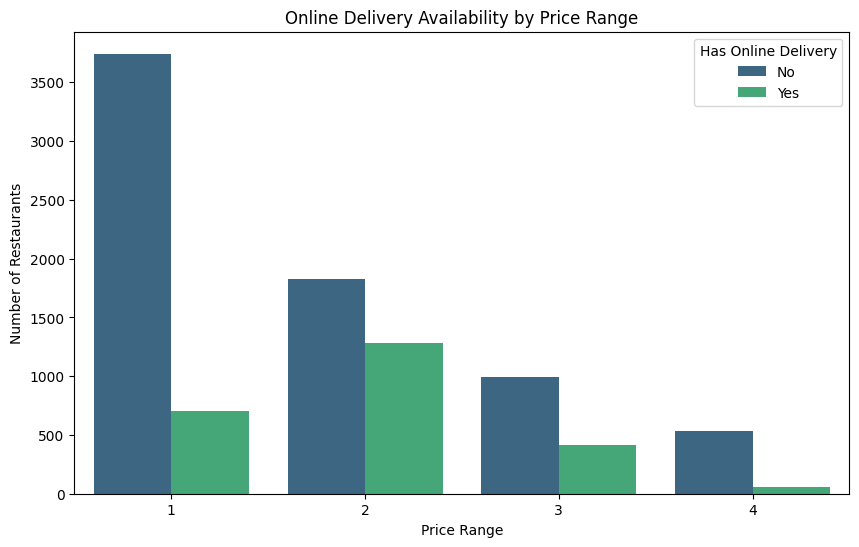

In [5]:
# Bar Chart for Online Delivery vs. Price Range
plt.figure(figsize=(10,6))
if 'Has Online delivery' in df.columns and 'Price range' in df.columns:
    sns.countplot(data=df, x='Price range', hue='Has Online delivery', palette='viridis')
    plt.title('Online Delivery Availability by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Restaurants')
    plt.legend(title='Has Online Delivery')
    plt.show()
else:
    print("\nVisualization columns not found.")


# Correlation Check

In [6]:
# Correlation between Rating and Price Range
if {'Aggregate rating', 'Price range'}.issubset(df.columns):
    corr = df[['Aggregate rating', 'Price range']].corr()
    print("\nCorrelation between Rating and Price Range:\n", corr)
else:
    print("\nCorrelation columns not found.")



Correlation between Rating and Price Range:
                   Aggregate rating  Price range
Aggregate rating          1.000000     0.437944
Price range               0.437944     1.000000


# Missing Data Overview

In [7]:
# Check for Missing Data
print("\nMissing Data Summary:\n", df.isnull().sum())



Missing Data Summary:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
